(50, 100)


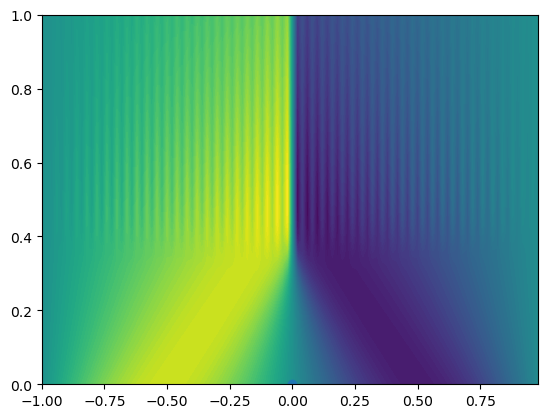

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift, fftfreq
from scipy.integrate import solve_ivp

#Creating data by solving the burgers equation in 1D
def init_KS(x,t=0):
    u = (1+np.sin(x/10))
    return u
def Fourier_n(u, Omega,n):
    u_hat = (1j*Omega)**n*fft(u)
    u_hat = ifft(u_hat)
    return u_hat

N = 100
L = 2
x = np.linspace(-L/2, L/2, N, endpoint=False)

n = fftfreq(N)*N
scale = 2*np.pi/L
Omega = scale*n
u0 = -np.sin(np.pi*x)

def burgers(u, Omega,nu):
    #dudt = -u*Fourier_n(u, Omega, 1)+nu*Fourier_n(u, Omega, 2)
    dudt = -0.5*Fourier_n(u*u, Omega, 1)+nu*Fourier_n(u, Omega, 2)
    return np.real(dudt)

tend = 1
tspan = [0, tend]
nu = 0.01/np.pi
tmeasurements = np.linspace(0, tend, 50)
sol = solve_ivp(lambda t, u: burgers(u, Omega,nu),tspan, u0, t_eval=tmeasurements)

print(sol.y.T.shape)
plt.figure()
plt.contourf(x,sol.t,sol.y.T, 100, cmap="viridis")
plt.plot(0,sol.y.T[0][0], 'o')
plt.show()


(100, 50)


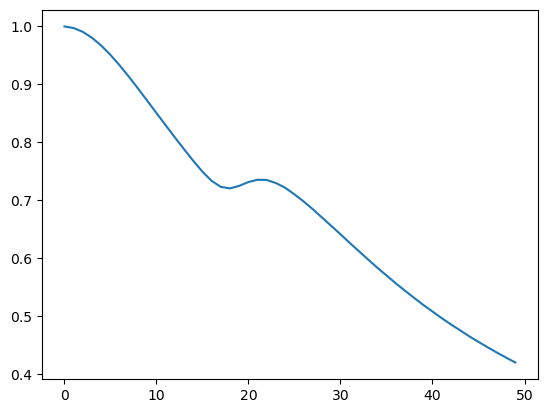

In [ ]:
print(sol.y.shape)
# plt.plot(sol.y.T[:,N//4])

In [45]:
import numpy as np

P = 1-0.057
x = 1
q = 0
while x > 0.5:
    x = x*P
    q += 1

print(q)

12
